In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('floral.csv')

In [7]:
print(data.head())

                 Address         City State    Zip  Store Store Teir  \
0  10677 E Northwest Hwy       Dallas    TX  75238    511          B   
1    532 W Interstate 30      Garland    TX  75043    403          C   
2   500 Marketplace Blvd       Forney    TX  75126    579          A   
3          1215 North St  Nacogdoches    TX  75961    990          C   
4   3205 N University Dr  Nacogdoches    TX  75965    566          C   

   10HB_Mum_Units  10Mum_Units  8Mum_Units  10HB_Mum_Sold  ...  \
0             NaN         56.0         272            NaN  ...   
1             NaN         56.0         204            NaN  ...   
2             NaN         56.0         272            NaN  ...   
3             NaN         56.0         204            NaN  ...   
4             NaN         56.0         204            NaN  ...   

   10HB_Mum_Shrink  10Mum_Units_Shrink  8Mum_Units_Shrink  10HB_Mum_Price  \
0              NaN                16.0                197           16.99   
1              N

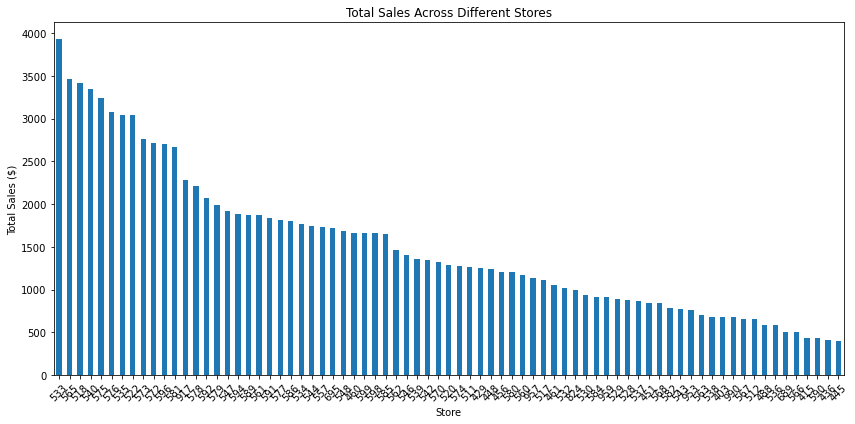

In [8]:
# Sales Trends: Total Sales Across Different Stores
sales_trends = data.groupby('Store')['Total_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='bar', title='Total Sales Across Different Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


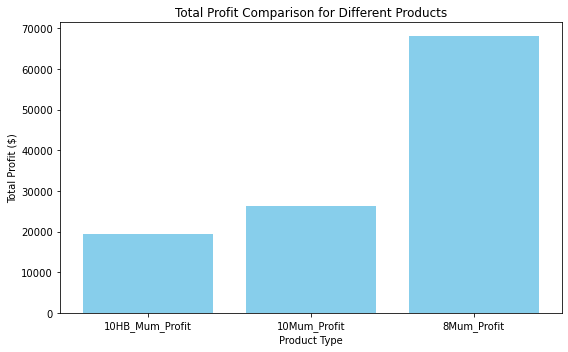

In [9]:
# Profit Analysis: Comparing Profit Margins for Different Products
profit_analysis = {
    '10HB_Mum_Profit': data['10HB_Mum_Profit'].sum(),
    '10Mum_Profit': data['10Mum_Profit'].sum(),
    '8Mum_Profit': data['8Mum_Profit'].sum()
}
plt.figure(figsize=(8, 5))
plt.bar(profit_analysis.keys(), profit_analysis.values(), color='skyblue')
plt.title('Total Profit Comparison for Different Products')
plt.xlabel('Product Type')
plt.ylabel('Total Profit ($)')
plt.tight_layout()
plt.show()


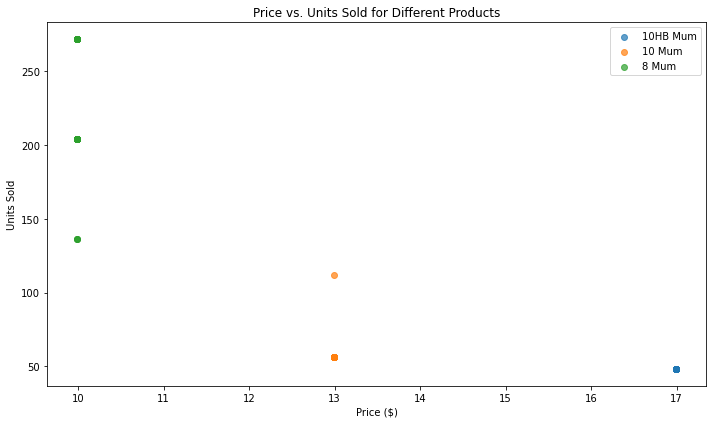

In [10]:
# Price vs. Units Sold: Relationship for Different Products
plt.figure(figsize=(10, 6))
plt.scatter(data['10HB_Mum_Price'], data['10HB_Mum_Units'], label='10HB Mum', alpha=0.7)
plt.scatter(data['10Mum_Price'], data['10Mum_Units'], label='10 Mum', alpha=0.7)
plt.scatter(data['8Mum_Price'], data['8Mum_Units'], label='8 Mum', alpha=0.7)
plt.title('Price vs. Units Sold for Different Products')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')
plt.legend()
plt.tight_layout()
plt.show()


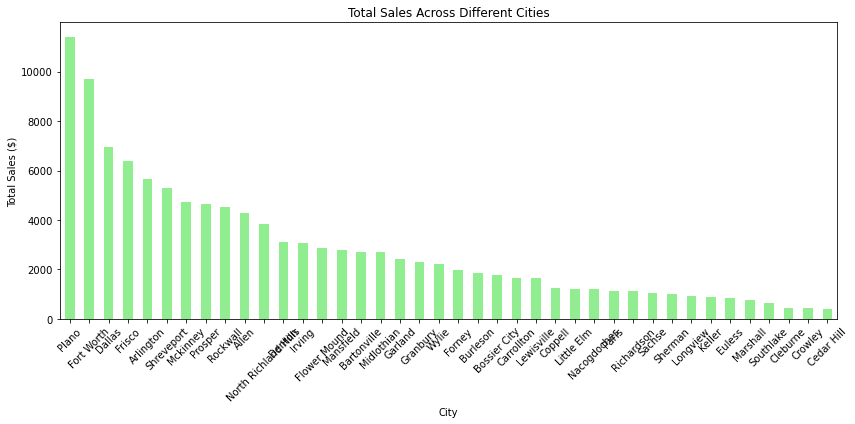

In [11]:
# Regional Sales Performance: Total Sales Across Different Cities
regional_sales = data.groupby('City')['Total_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
regional_sales.plot(kind='bar', color='lightgreen', title='Total Sales Across Different Cities')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


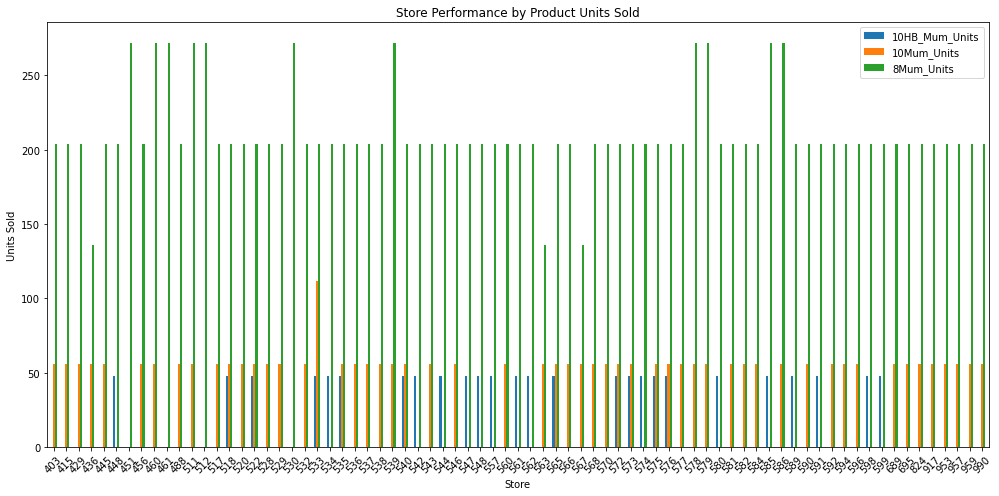

In [12]:
# Store Performance Comparison by Product
store_performance = data.groupby('Store')[['10HB_Mum_Units', '10Mum_Units', '8Mum_Units']].sum()

# Plotting Store Performance Comparison
store_performance.plot(kind='bar', figsize=(14, 7), title='Store Performance by Product Units Sold')
plt.xlabel('Store')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


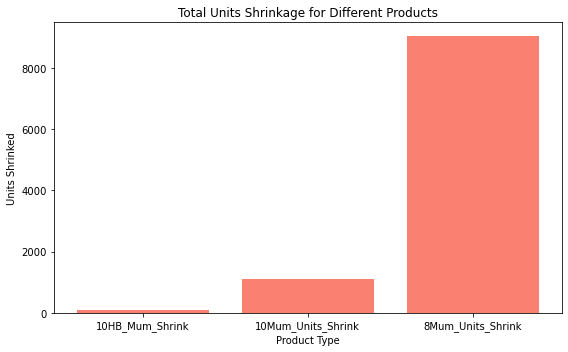

In [13]:
# Shrinkage Analysis: Summing up the shrinkage for each product type
shrinkage_analysis = {
    '10HB_Mum_Shrink': data['10HB_Mum_Shrink'].sum(),
    '10Mum_Units_Shrink': data['10Mum_Units_Shrink'].sum(),
    '8Mum_Units_Shrink': data['8Mum_Units_Shrink'].sum()
}

# Plotting Shrinkage Analysis
plt.figure(figsize=(8, 5))
plt.bar(shrinkage_analysis.keys(), shrinkage_analysis.values(), color='salmon')
plt.title('Total Units Shrinkage for Different Products')
plt.xlabel('Product Type')
plt.ylabel('Units Shrinked')
plt.tight_layout()
plt.show()


10HB_Mum_Correlation: nan
10Mum_Correlation: nan
8Mum_Correlation: nan


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


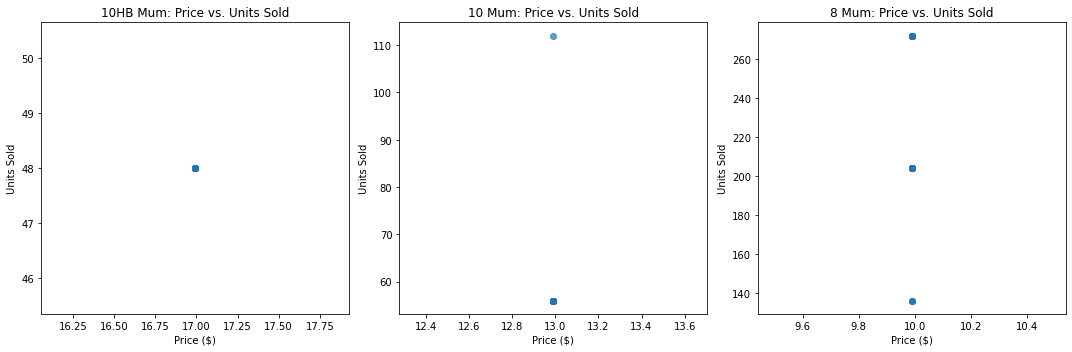

In [15]:
# Calculating correlation between price and units sold for each product type
price_elasticity = {
    '10HB_Mum_Correlation': data['10HB_Mum_Price'].corr(data['10HB_Mum_Units']),
    '10Mum_Correlation': data['10Mum_Price'].corr(data['10Mum_Units']),
    '8Mum_Correlation': data['8Mum_Price'].corr(data['8Mum_Units'])
}

# Printing the correlation values
for product, correlation in price_elasticity.items():
    print(f"{product}: {correlation:.2f}")

# Visualizing the relationship using scatter plots for better understanding
plt.figure(figsize=(15, 5))

# 10HB Mum
plt.subplot(1, 3, 1)
plt.scatter(data['10HB_Mum_Price'], data['10HB_Mum_Units'], alpha=0.7)
plt.title('10HB Mum: Price vs. Units Sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')

# 10 Mum
plt.subplot(1, 3, 2)
plt.scatter(data['10Mum_Price'], data['10Mum_Units'], alpha=0.7)
plt.title('10 Mum: Price vs. Units Sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')

# 8 Mum
plt.subplot(1, 3, 3)
plt.scatter(data['8Mum_Price'], data['8Mum_Units'], alpha=0.7)
plt.title('8 Mum: Price vs. Units Sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')

plt.tight_layout()
plt.show()



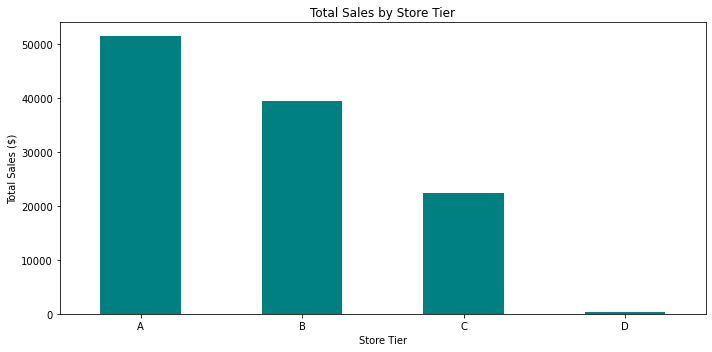

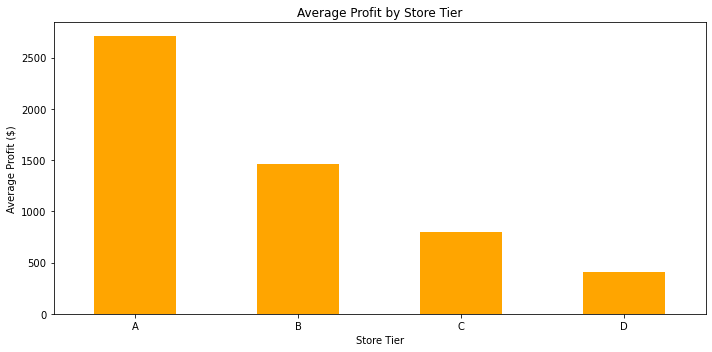

In [17]:
# Grouping data by Store Tier and calculating total sales and average profit
store_tier_analysis = data.groupby('Store Teir').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Avg_Profit=('10HB_Mum_Profit', 'mean')
).copy()

# Adding the average profits from the other columns to get the total average profit
store_tier_analysis['Avg_Profit'] += data.groupby('Store Teir')['10Mum_Profit'].mean()
store_tier_analysis['Avg_Profit'] += data.groupby('Store Teir')['8Mum_Profit'].mean()

# Plotting Total Sales by Store Tier
plt.figure(figsize=(10, 5))
store_tier_analysis['Total_Sales'].plot(kind='bar', color='teal', title='Total Sales by Store Tier')
plt.xlabel('Store Tier')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting Average Profit by Store Tier
plt.figure(figsize=(10, 5))
store_tier_analysis['Avg_Profit'].plot(kind='bar', color='orange', title='Average Profit by Store Tier')
plt.xlabel('Store Tier')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



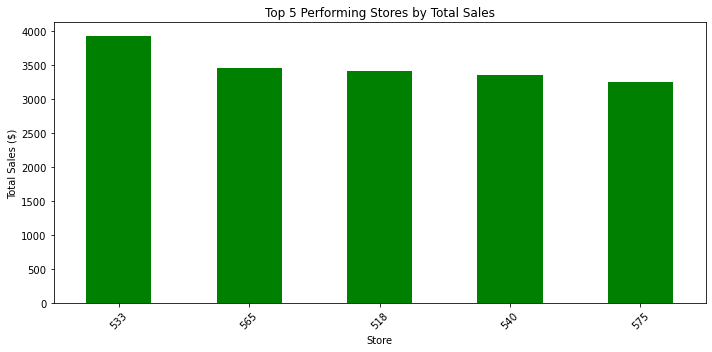

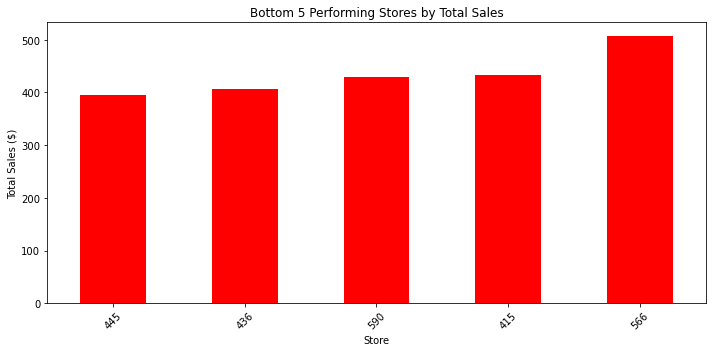

In [18]:
# Identifying Top and Bottom Performing Stores based on Total Sales
top_performing_stores = data.groupby('Store')['Total_Sales'].sum().nlargest(5)
bottom_performing_stores = data.groupby('Store')['Total_Sales'].sum().nsmallest(5)

# Plotting Top Performing Stores
plt.figure(figsize=(10, 5))
top_performing_stores.plot(kind='bar', color='green', title='Top 5 Performing Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Bottom Performing Stores
plt.figure(figsize=(10, 5))
bottom_performing_stores.plot(kind='bar', color='red', title='Bottom 5 Performing Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
